get_peaks_index---------- [ 1 10 15 21 23 30 37 42 47 55 59 63 65 68 71 74 78 81 83 87]
get_peaks_index---------- [ 1 30 47 71 78]
3134645.5779633108


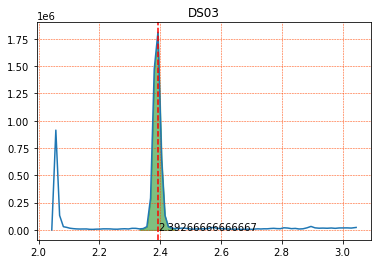

In [18]:
import csv
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
from scipy.signal import find_peaks


def find_peaks_index(height_value):
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html#scipy.signal.find_peaks
    # 找出满足条件的峰的索引
    get_peaks_index, _ = find_peaks(peak_height, prominence=1, height=height_value)
    print("get_peaks_index----------", get_peaks_index)
    return get_peaks_index

# 根据峰索引找到对应的峰高
def get_three_quarters_of_peak_height():
    height_of_peak_index_list = []
    for peak_index in peaks_index_by_height_value_10:
        height_of_peak_index_list.append(df_smoothed_1.iloc[peak_index, 1])
    height_of_peak_index_list.sort()
    three_quarters_of_peak_height_value = height_of_peak_index_list[int(len(height_of_peak_index_list) * 0.75)]
    return three_quarters_of_peak_height_value



# 根据峰索引找到对应的时间点
def get_time_of_peak_index():
    time_of_peak_index_list = []
    for peak_index in peaks_index:
        time_of_peak_index_list.append(df_smoothed_1.iloc[peak_index, 0])
    return time_of_peak_index_list

# 判断在窗口范围内峰的个数
def peak_count_in_window():
    cnt = 0
    idx_list =[]
    # print("sub_half_window, add_half_window----------", sub_half_window, add_half_window)

    for idx, item in enumerate(time_of_peaks):
        # print("%d ----------" %idx, item)
        if sub_half_window < item < add_half_window:
            cnt += 1
            idx_list.append(idx)
    # print("cnt----------", cnt, idx_list)
    return cnt, idx_list

# 根据窗口内的峰, 找到离rt最近的峰 确定为新的rt
def get_new_rt():
    res = []
    time_of_peaks_list = []
    for i in peaks_idx_in_window:
        # print(time_of_peaks[i])
        time_of_peaks_list.append(time_of_peaks[i])
        res.append(abs(time_of_peaks[i] - rt))
    # print("res----------", res)
    return time_of_peaks_list[res.index(min(res))]



# 获取新的峰边界
def get_new_peak_boundary():
    tmp_left = new_rt - sub_start
    tmp_right = new_rt + sub_end
    if tmp_left < 0:
        tmp_left = 0
    return tmp_left, tmp_right

def get_nearby_peak_height_and_final_peak_boundary_time():
    global final_left_peak_boundary_time, final_right_peak_boundary_time
    res_left = []
    res_right = []
    for idx, time in enumerate(df_smoothed_1_peak_rt):
        # print("%d----------"%idx, time)
        # time_of_peaks_list.append(time_of_peaks[i])
        res_left.append(abs(left_peak_boundary_time - time))
        res_right.append(abs(right_peak_boundary_time - time))
    left_nearby_peak_time_index = res_left.index(min(res_left))
    right_nearby_peak_time_index = res_right.index(min(res_right))
    left_nearby_peak_time_height = df_smoothed_1_peak_height[left_nearby_peak_time_index]
    right_nearby_peak_time_height = df_smoothed_1_peak_height[right_nearby_peak_time_index]
    for i in range(left_nearby_peak_time_index - 1, -1, -1):
        # print(i, df_smoothed_1_peak_height[i])
        if df_smoothed_1_peak_height[i] <= left_nearby_peak_time_height:
            left_nearby_peak_time_height = df_smoothed_1_peak_height[i]
        else:
            final_left_peak_boundary_time = df_smoothed_1_peak_rt[i+1]
            # print("final_left_peak_boundary_time----------",final_left_peak_boundary_time, left_nearby_peak_time_height)
            break

    for i in range(right_nearby_peak_time_index, len(df_smoothed_1_peak_rt)+1):
        # print(i, df_smoothed_1_peak_height[i])
        if df_smoothed_1_peak_height[i] <= right_nearby_peak_time_height:
            right_nearby_peak_time_height = df_smoothed_1_peak_height[i]
        else:
            final_right_peak_boundary_time = df_smoothed_1_peak_rt[i-1]
            # print("final_right_peak_boundary_time----------",final_right_peak_boundary_time, right_nearby_peak_time_height)
            break

    return final_left_peak_boundary_time, final_right_peak_boundary_time
# def move_to_valley_bottom():
#     pass

# def draw_peak():
#     # 绘图
#     # mp.plot(peaks_index, peak_height[peaks_index], "xr")
#     mp.plot(peak_rt, peak_height)
#     mp.axvline(rt, color='red', linestyle='--')
#     mp.text(rt, 0, rt)
#     mp.title(feature)
#     # 绘制刻度定位器
#     ax = mp.gca()
#     ax.grid(which='major', axis='both', linestyle='--', color='orangered', linewidth=0.5)
#     mp.fill_between(rt_interval, peak_height_interval, interpolate=True, color='green', alpha=0.5)
#     mp.show()

def calc_peak_area():
    # 1.得到新的峰边界

    # 2.得到新的峰边界在未做平滑的数据中的索引
    rt_start_index = df_smoothed_1[df_smoothed_1.loc[:, 0] == rt_start].index.tolist()[0]
    rt_end_index = df_smoothed_1[df_smoothed_1.loc[:, 0] == rt_end].index.tolist()[0]
    # print("rt_start_index, rt_end_index----------", rt_start_index, rt_end_index)

    # 3.根据索引得到数据
    x = np.array(df_smoothed_1.loc[rt_start_index:rt_end_index, 0])
    y = np.array(df_smoothed_1.loc[rt_start_index:rt_end_index, 1])

    # 获取新的rt
    new_rt = x[y.argmax()]
    # print(new_rt)

    # 绘图
    # mp.plot(peaks_index, peak_height[peaks_index], "xr")
    mp.plot(df_smoothed_1_peak_rt, df_smoothed_1_peak_height)
    mp.axvline(new_rt, color='red', linestyle='--')
    mp.text(new_rt, 0, new_rt)
    mp.title(feature)
    # 绘制刻度定位器
    ax = mp.gca()
    ax.grid(which='major', axis='both', linestyle='--', color='orangered', linewidth=0.5)
    mp.fill_between(x, y, interpolate=True, color='green', alpha=0.5)
    mp.show()

    # 4.计算积分面积
    n = len(x)
    total_area = 0
    lin_space_value = 1001
    for i in range(1, n):
        k = (y[i] - y[i - 1]) / (x[i] - x[i - 1])
        b = y[i] - k * x[i]
        # print(k, b)
        lin_x = np.linspace(x[i - 1], x[i], lin_space_value)  # 分割x为lin_space_value份
        for j in range(1, lin_space_value):
            h = k * lin_x[j] + b
            area = (lin_x[j] - lin_x[j - 1]) * h
            total_area += area
    total_area = total_area * 60

    # 截距
    noise = (y[0] + y[n - 1]) * ((x[n - 1] - x[0]) * 60) / 2

    peak_area = total_area - noise
    return peak_area

def write_csv_file(data, write_filename):
    data = list(map(lambda x: [x], data))
    with open(write_filename, 'w', newline='') as f:
        writer = csv.writer(f)
        for row in data:
            writer.writerow(row)
if __name__ == '__main__':
    # filepath = 'C:/XIC/run1/neg/S01_RD007/smoothed_1_weight/'
    filepath = 'C:/XIC/run1/neg/S01_RD048/'
    filename = 'DS03.txt'
    feature = filename.split('.')[0]

    # 读文件
    df_smoothed_1 = pd.read_csv(filepath + filename, sep='\t', header=None)

    # df_smoothed_1 样本离子对的时间序列和峰高
    df_smoothed_1_peak_rt = df_smoothed_1.loc[:, 0]
    df_smoothed_1_peak_height = df_smoothed_1.loc[:, 1]

    # 获取feature给出的rt和左右峰边界
    df_ion_list = pd.read_csv('neg_ion_list_20210111_new.csv')
    feature_data = df_ion_list[df_ion_list['ID'] == feature].values.tolist()[0]
    rt = feature_data[3]
    left_start = feature_data[4]
    right_end = feature_data[5]


    sub_start = feature_data[6]
    sub_end = feature_data[7]

    # 得到窗口
    sub_half_window = feature_data[8]
    add_half_window = feature_data[9]

    # 获取峰边界在一次平滑数据里的索引位置
    # left_start_index = df_smoothed_1[df_smoothed_1.loc[:, 0] > left_start].index.tolist()[0]  # 找到离他最近的比它大的数的索引
    # right_end_index = df_smoothed_1[df_smoothed_1.loc[:, 0] < right_end].index.tolist()[-1]  # 找到离他最近的比它小的数的索引
    # print("left_start_index, right_end_index----------", left_start_index, right_end_index)

    peak_rt = df_smoothed_1.loc[:, 0]
    peak_height = df_smoothed_1.loc[:, 1]
    # 根据峰高找到峰的索引
    peaks_index_by_height_value_10 = find_peaks_index(height_value=10)
    three_quarters_of_peak_height = get_three_quarters_of_peak_height()
    peaks_index = find_peaks_index(height_value=three_quarters_of_peak_height)

    # 得到区间
    # rt_interval = df_smoothed_1.loc[left_start_index:right_end_index, 0]
    # peak_height_interval = df_smoothed_1.loc[left_start_index:right_end_index, 1]
    # print("rt_interval----------", rt_interval)
    # print("peak_height_interval----------", peak_height_interval)

    time_of_peaks = get_time_of_peak_index()
    # print("time_of_peaks----------", time_of_peaks)

    peak_count, peaks_idx_in_window = peak_count_in_window()
    if peak_count == 0:
        # 没有峰 返回面积为0
        pass
    else:
        new_rt = get_new_rt()
        # print("new_rt----------", new_rt)
    # print("--------------------------------------------------" )

    left_peak_boundary_time, right_peak_boundary_time = get_new_peak_boundary()
    # print("left_peak_boundary_time----------", left_peak_boundary_time)
    # print("right_peak_boundary_time----------", right_peak_boundary_time)

    rt_start, rt_end = get_nearby_peak_height_and_final_peak_boundary_time()
    # print("rt_start, rt_end----------", rt_start, rt_end)

    print(calc_peak_area())

    # 绘制峰
    # draw_peak()

